# Plotting Tools

# matplotlib 

The most common python plotting library is matplotlib. Matplotlib provides an advanced
object-oriented interface and a Matlab-like interface called **pyplot**

You can see some examples of it in action at
https://matplotlib.org/gallery.html

In [1]:
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


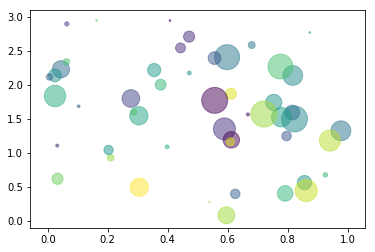

In [2]:
# generate some data
N = 50
xp = np.random.rand(N)
yp = 3*np.random.rand(N)
colors = np.random.rand(N)
radii = 15 * np.random.rand(N)
area = np.pi * radii**2  # 0 to 15 point radiuses

# plot the data
plt.figure()
plt.scatter(xp, yp, s=area, c=colors, alpha=0.5)

# call show
plt.show()

<IPython.core.display.Javascript object>


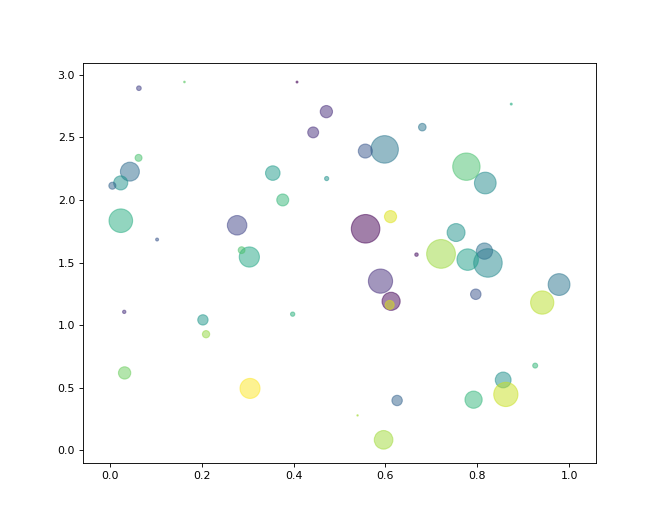

In [6]:
%matplotlib notebook
# bug?  need to do it twice smetimes
%matplotlib notebook  
# plot the data
plt.figure()
plt.scatter(xp, yp, s=area, c=colors, alpha=0.5);

# PLOTLY

Highly recommended alternative to matplotlib.  There is an old API and a new one that creates
a jupyter widgets which interacts well when building GUIs.

In [7]:
import plotly
import plotly.graph_objs as go
import numpy as np

# The old way to use plotly in Jupyter is to use iplot
# either online (if you have an account) or offline
from plotly.offline import iplot
plotly.offline.init_notebook_mode(connected=True)

N = 500
random_x = np.linspace(0, 1, N)
random_y = np.random.randn(N)

# Create a trace
trace = go.Scatter(
    x = random_x,
    y = random_y
)

data = [trace]

iplot(data)

In [8]:
# The new way to use plotly is to use FigureWidget()
# FigureWidgets work like other Jupyter widgets.

data = [go.Bar(x=['A', 'B', 'C'],
            y=[2,4,6])]

go.FigureWidget(data)

FigureWidget({
    'data': [{'type': 'bar', 'uid': 'b77e6014-d209-4c38-b142-d2ddba2684c0', 'x': ['A', 'B', 'C'…

In [9]:
f = go.FigureWidget()
f.add_contour(
    z=[[10, 10.625, 12.5, 15.625, 20],
        [5.625, 6.25, 8.125, 11.25, 15.625],
        [2.5, 3.125, 5., 8.125, 12.5],
        [0.625, 1.25, 3.125, 6.25, 10.625],
        [0, 0.625, 2.5, 5.625, 10]]
    )
f

FigureWidget({
    'data': [{'type': 'contour',
              'uid': '314e7127-d5a6-4b2d-bf37-024cdd8e1752',
 …

In [10]:
s = np.linspace(0, 2 * np.pi, 240)
t = np.linspace(0, np.pi, 240)
tGrid, sGrid = np.meshgrid(s, t)

r = 2 + np.sin(7 * sGrid + 5 * tGrid)  # r = 2 + sin(7s+5t)
x = r * np.cos(sGrid) * np.sin(tGrid)  # x = r*cos(s)*sin(t)
y = r * np.sin(sGrid) * np.sin(tGrid)  # y = r*sin(s)*sin(t)
z = r * np.cos(tGrid)                  # z = r*cos(t)

f2 = go.FigureWidget()
f2.add_surface(x=x, y=y, z=z)
f2

FigureWidget({
    'data': [{'type': 'surface',
              'uid': '8f575b36-8ab5-4d3d-8acf-38b30969c7ec',
 …

In [13]:
f2.layout.height=800

In [14]:
A=1
B=0
x = np.linspace(0,10,200)
y = np.sin(A*x+B)

fig = go.FigureWidget()
sline = fig.add_scatter(line={'color': 'red', 'width': 3},
            name="A=%s, B=%s" % (A, B),
            x=x,
            y=y
        )
fig

FigureWidget({
    'data': [{'line': {'color': 'red', 'width': 3},
              'name': 'A=1, B=0',
         …

In [15]:
def update_plot(A, B, color):
    y = np.sin(A*x+B)
    with fig.batch_update():
        sline.line.color = color
        sline.y = y

In [16]:
from ipywidgets import interact
interact(update_plot, A=(0,10), B=(0,10), color=['red', 'green', 'blue']);

interactive(children=(IntSlider(value=5, description='A', max=10), IntSlider(value=5, description='B', max=10)…